## OLS Tablosu Okuma (Ordinary List Square)


In [87]:
import pandas as pd
import numpy as np
import seaborn as sns

In [88]:
df = pd.read_csv("Advertising.csv",index_col=0)

In [89]:
data = df[["TV","sales"]]

X = data["TV"]
y = data["sales"]

In [90]:
X.shape

(200,)

In [91]:
#Yeniden Boyutlandırmammız lazım
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

## Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=100)

## Statsmodels OLS

In [14]:
import statsmodels.api as sm

In [15]:
# statsmodels ile OLS(ordinary List square) çalıştır
# statsmodels ols fonksiyonu beta 0 için otomatik değer atamaz
#o yüzden beta 0 için 1 katsayısını bizim eklememiz lazım

In [16]:
X_train_ols = sm.add_constant(X_train)

In [17]:
#statsmodel OLS modeli oluştur
sm_model = sm.OLS(y_train,X_train_ols)

In [18]:
#OLS modelinin  sonuçlarını al
sonuc = sm_model.fit()

In [19]:
print(sonuc.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           2.84e-30
Time:                        10:45:40   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

## multiple linear regression

In [20]:
# 1 --> Önce Datayı ham olarak  inceleyelim 
# 2 --> Datayı import edelim 
# 3 --> Datayı inceleyelim (head,describe,info)
# 4  --> Datayı görselleştir
# 5 --> Modeli oluştur (Formüller)
# 6 -->  Hazırlık
# 7 --> Train -Test split
# 8 --> Çoklu Lineer regresyon modelini Çalıştır (Fit)
# 9 --> Katsayıları  incele(intercept_,coef_) 
# 10 --> tahmin yap (predict)
# 11 -->Gerçek Data ve Tahmin Datasını çiz
# 12 --> Hataları Çiz
# 13 --> Model Doğruluğunu kontrol et(RMSE ve R**2)
# 14 -->OLS - p- değerlerini incele 
# 15 --> Korelasyon
# 16 -->Sonuçlara göre tekrar model oluştur

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("Advertising.csv",index_col=0)

In [23]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [24]:
 df.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [25]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


## 4 - Datayı Görselleştir

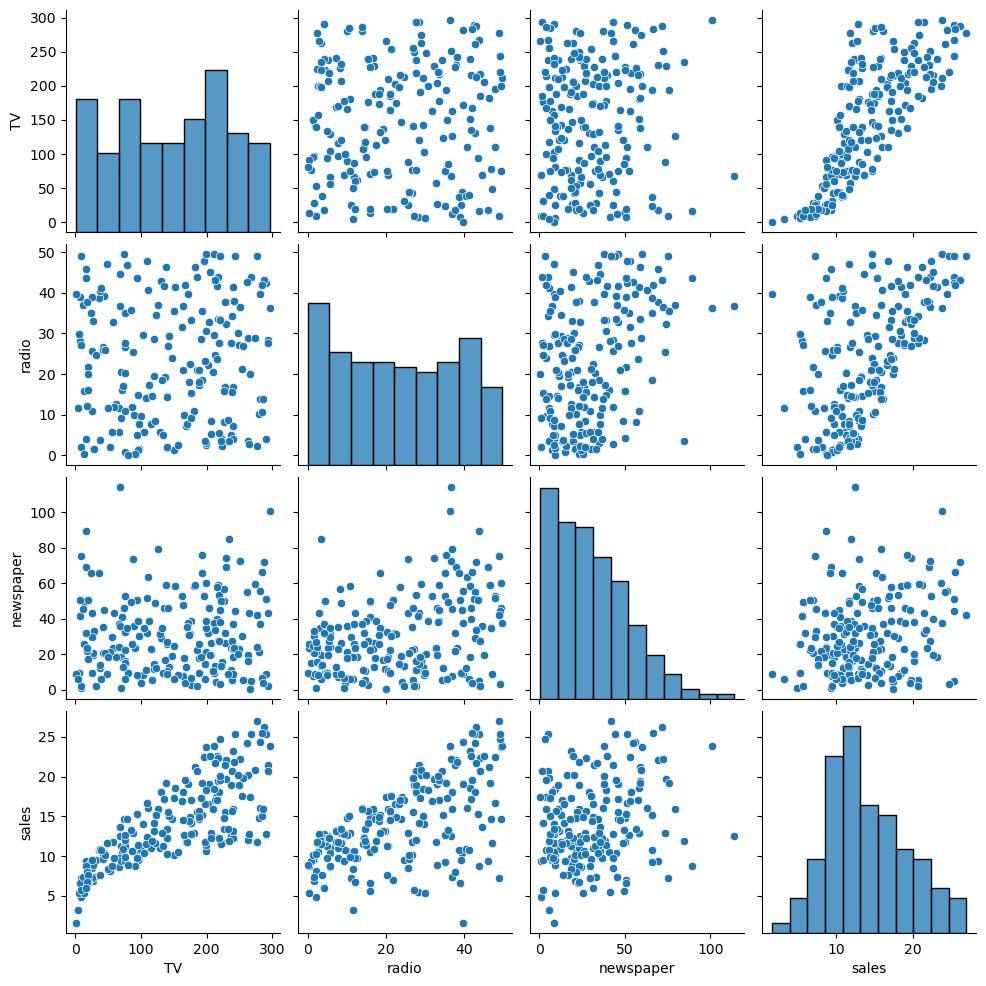

In [27]:
sns.pairplot(df)

In [28]:
X = df[["TV","radio","newspaper"]]

In [29]:
X


,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [30]:
y = df["sales"]

In [31]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

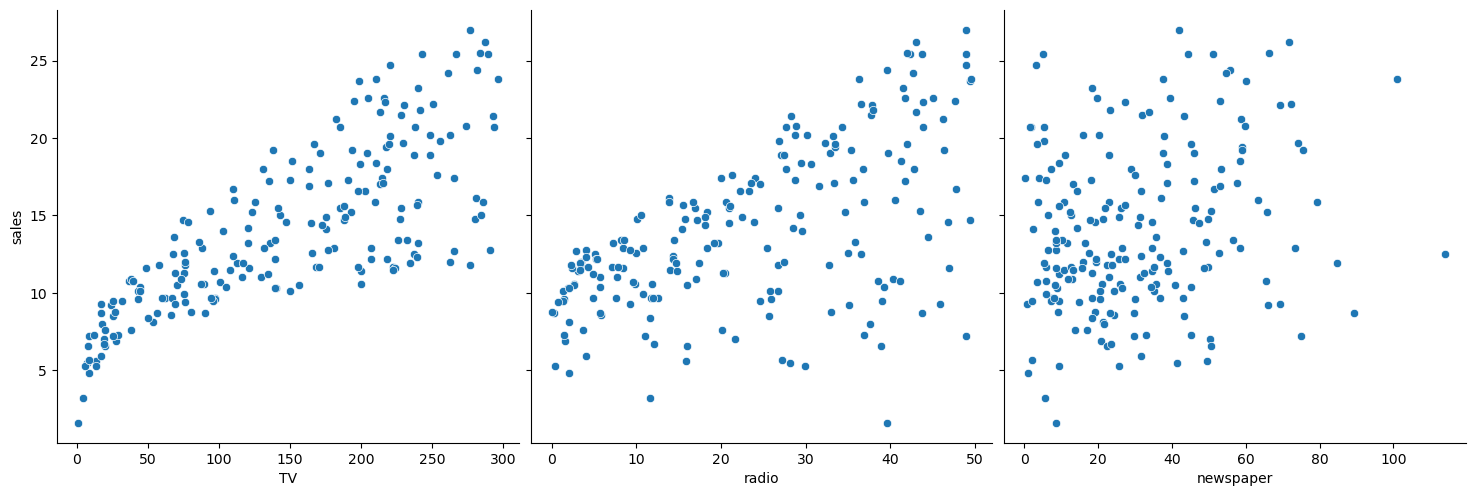

In [32]:
#Sadece girdiler --> Çıktı ikilisi
sns.pairplot(df,x_vars=df.columns[:3],y_vars=df.columns[3],height=5)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

## Hazırlık


In [93]:
print("X'in boyutu :",X.shape)
print("y'in boyutu :",y.shape)

X'in boyutu : (200, 1)
y'in boyutu : (200, 1)


In [36]:
#y'yi yeniden boyutlandırmamız lazım
#(200,1) şeklinde
y = y.values.reshape(-1,1)

In [37]:
print("Y'nin boyutu :",y.shape)

Y'nin boyutu : (200, 1)


## 7- Train - Test Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=100)

In [40]:
print("X_train'in boyutu:",X_train.shape)
print("y_train'in boyutu:",y_train.shape)

print("X_test'in boyutu :",X_test.shape)
print("y_test'in boyutu :",y_test.shape)


X_train'in boyutu: (140, 3)
y_train'in boyutu: (140, 1)
X_test'in boyutu : (60, 3)
y_test'in boyutu : (60, 1)


## 8- Linear Regression  Modelini Çalıştır(Fit)

In [41]:
lr.fit(X_train,y_train)

LinearRegression()

## 9 - Katsayıları Hesaplama(intercept_ ,coef_)


In [42]:
print("intercept:",lr.intercept_)

intercept: [2.65278967]


In [43]:
print("coefficient:",lr.coef_)

coefficient: [[0.0454256  0.18975773 0.00460308]]


In [44]:
katsayilar = pd.DataFrame(lr.coef_,columns=["beta_1(TV)","beta_2(Radio)","beta_3(Newspaper)"])
katsayilar

,beta_1(TV),beta_2(Radio),beta_3(Newspaper)
0,0.045426,0.189758,0.004603


## Tahmin Yap

In [45]:
y_pred = lr.predict(X_test)

In [46]:
#Tahmin datasının şekli
y_pred.shape 

(60, 1)

In [47]:
#test datasının (orjinal data) şekli
#y_true
y_test.shape

(60, 1)

 ## 11 - Gerçek Data  ve Tahmin Datasını çiz

In [48]:
y_test[:10]

array([[ 6.6],
       [20.7],
       [17.2],
       [19.4],
       [21.8],
       [12.2],
       [12.2],
       [11.7],
       [22.6],
       [22.3]])

In [49]:
y_pred[:10]

array([[10.62160072],
       [20.00625302],
       [16.91850882],
       [19.17040746],
       [20.94974131],
       [13.12284284],
       [11.80740696],
       [12.32019766],
       [20.57806782],
       [20.95662688]])

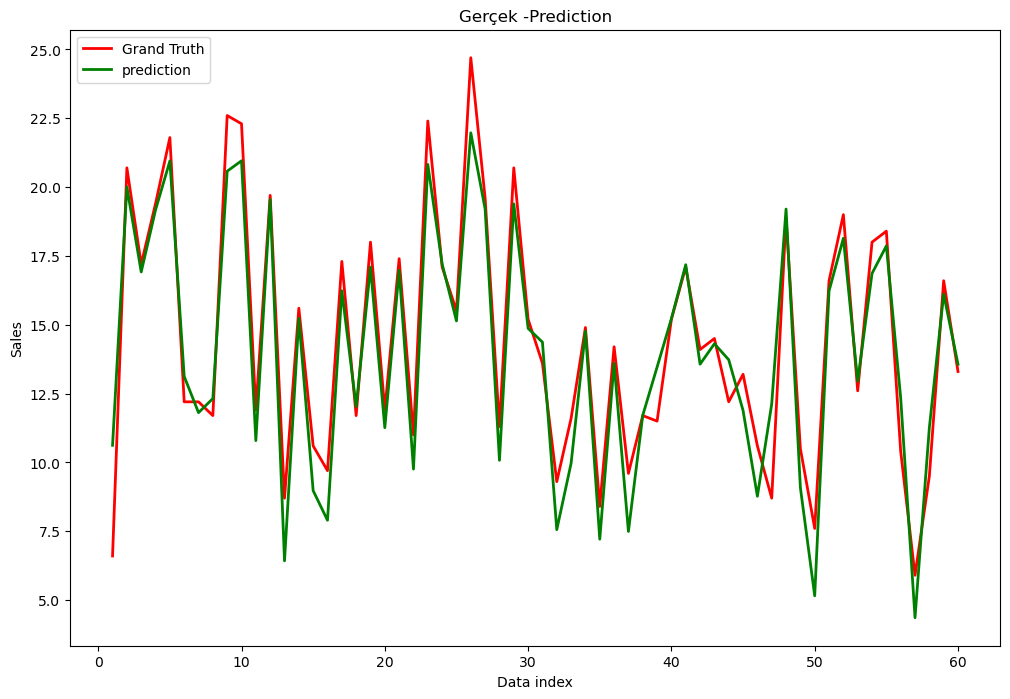

In [50]:
# Her bir tahmin noktasındaki değişimi görelim 
indexler =  range(1,61)
#Gerçek Data -->  Grand Truth
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler,y_test,label="Grand Truth",color = "red",linewidth=2)
#Tahmin --> Prediction
ax.plot(indexler,y_pred,label= "prediction",color="green",linewidth=2)

plt.title("Gerçek -Prediction")
plt.xlabel("Data index")
plt.ylabel("Sales")
plt.legend(loc="upper left")
plt.show()

In [51]:
import numpy as np

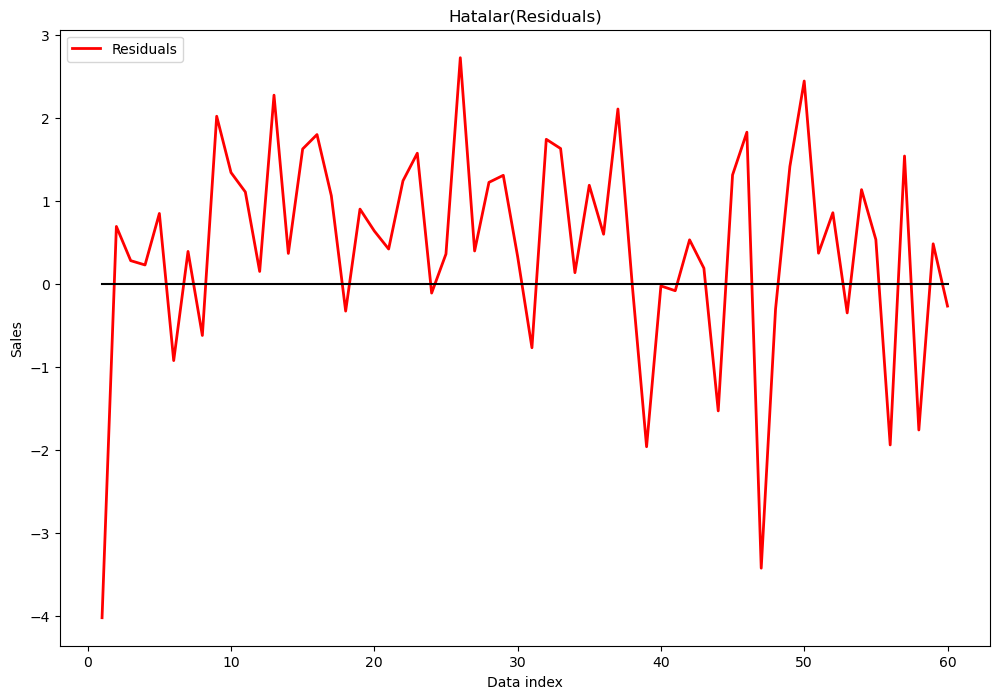

In [94]:
# Her bir tahmin noktasındaki hatayı görelim 
indexler =  range(1,61)
#Residuals -->  Hatalar
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test - y_pred , label="Residuals",color = "red",linewidth=2)
#Sıfır doğrusunu çiz
ax.plot(indexler,np.zeros(60),color= "black")

plt.title("Hatalar(Residuals)")
plt.xlabel("Data index")
plt.ylabel("Sales")
plt.legend(loc="upper left")
plt.show()

## 13 - Model Doğruluğunu kontrol et(RMSE ve R**2)

In [53]:
from sklearn.metrics import r2_score,mean_squared_error

In [54]:
r_2 = r2_score(y_test,y_pred)

In [55]:
print("R^2 Score :",r_2*100)

R^2 Score : 90.58622107532246


## OLS

In [56]:
import statsmodels.api as sm

In [57]:
# statsmodels ile OLS(ordinary List square) çalıştır
# statsmodels ols fonksiyonu beta 0 için otomatik değer atamaz
#o yüzden beta 0 için 1 katsayısını bizim eklememiz lazım
X_train_ols = sm.add_constant(X_train)

In [58]:
X_train_ols

,const,TV,radio,newspaper
75,1.0,213.4,24.6,13.1
4,1.0,151.5,41.3,58.5
186,1.0,205.0,45.1,19.6
27,1.0,142.9,29.3,12.6
91,1.0,134.3,4.9,9.3
...,...,...,...,...
88,1.0,110.7,40.6,63.2
104,1.0,187.9,17.2,17.9
68,1.0,139.3,14.5,10.2
25,1.0,62.3,12.6,18.3


In [59]:
#Sstatmodel OLS yi oluştur

sm_model = sm.OLS(y_train,X_train_ols)#önce y sonra X

In [60]:
#OLS modelinin sonuçlarını  al 
sonuc = sm_model.fit()

In [61]:
#OLS özet tablosunu  yazdır
print(sonuc.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           9.97e-66
Time:                        10:45:44   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

 ## 15- Korelasyon(correlation)

<Axes: >

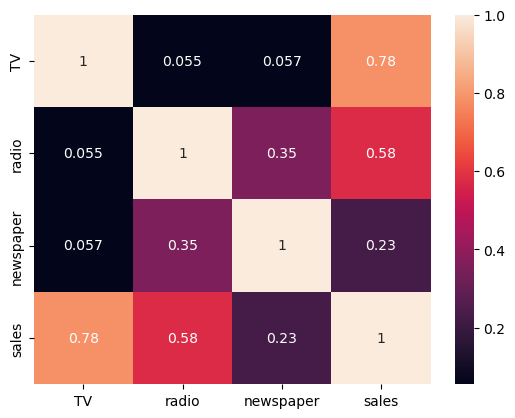

In [62]:
sns.heatmap(df.corr(),annot=True)

In [63]:
#yeni feature matrisi 
#X_train_yeni 
#X_test_yeni

X_train_yeni  = X_train[["TV","radio"]]
X_train_yeni.head()

,TV,radio
75,213.4,24.6
4,151.5,41.3
186,205.0,45.1
27,142.9,29.3
91,134.3,4.9


In [64]:
X_test_yeni  = X_train[["TV","radio"]]
X_test_yeni.head()

,TV,radio
75,213.4,24.6
4,151.5,41.3
186,205.0,45.1
27,142.9,29.3
91,134.3,4.9


In [65]:
lr.fit(X_train_yeni,y_train)

LinearRegression()

In [66]:
y_pred_yeni = lr.predict(X_test_yeni)

In [67]:
y_pred_yeni

array([[17.17100019],
       [17.56705789],
       [20.73453062],
       [14.86561543],
       [ 9.77731937],
       [ 6.37078979],
       [14.42706446],
       [11.64805635],
       [ 6.6821921 ],
       [14.5788035 ],
       [12.61641331],
       [ 8.8088659 ],
       [12.20656973],
       [14.05752562],
       [16.91950341],
       [15.05668659],
       [14.94265693],
       [ 6.84520546],
       [17.99537879],
       [14.05099762],
       [10.55906197],
       [12.85124799],
       [23.20235432],
       [14.31154208],
       [15.02285958],
       [19.14968323],
       [ 6.3517548 ],
       [18.37532394],
       [16.94481501],
       [24.09133447],
       [ 9.13844384],
       [20.3573779 ],
       [15.54535742],
       [15.62927483],
       [11.65080255],
       [20.22422944],
       [15.36338475],
       [14.51027336],
       [16.10546003],
       [12.3170106 ],
       [16.36728338],
       [16.74469616],
       [24.73981129],
       [12.41325469],
       [16.59866335],
       [ 9

In [68]:
X_train_yeni_OLS = sm.add_constant(X_train_yeni)

In [69]:
X_train_yeni_OLS

,const,TV,radio
75,1.0,213.4,24.6
4,1.0,151.5,41.3
186,1.0,205.0,45.1
27,1.0,142.9,29.3
91,1.0,134.3,4.9
...,...,...,...
88,1.0,110.7,40.6
104,1.0,187.9,17.2
68,1.0,139.3,14.5
25,1.0,62.3,12.6


In [70]:
sm_model = sm.OLS(y_train,X_train_yeni_OLS)
sonuc = sm_model.fit()

In [71]:
print(sonuc.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           4.46e-67
Time:                        10:45:45   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

## Katagorik Data 

## Label Encoding

In [72]:
evlilikDurumu = ("evli","bekar","belirtilmemiş")
evlilikDf = pd.DataFrame(evlilikDurumu,columns=["Evlilik Durumu"])
evlilikDf

,Evlilik Durumu
0,evli
1,bekar
2,belirtilmemiş


In [73]:
#Sutun Tipini gör ---> object
evlilikDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Evlilik Durumu  3 non-null      object
dtypes: object(1)
memory usage: 156.0+ bytes


In [74]:
#Sutun tipini Katagoriye Dönüştür
evlilikDf["Evlilik Durumu"]=evlilikDf["Evlilik Durumu"].astype("category")

In [75]:
evlilikDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Evlilik Durumu  3 non-null      category
dtypes: category(1)
memory usage: 267.0 bytes


In [76]:
#katagoriler numerik veriler ata ve yeni bir sutun yarat
evlilikDf["evlilik Katagorileri"] = evlilikDf["Evlilik Durumu"].cat.codes
evlilikDf

,Evlilik Durumu,evlilik Katagorileri
0,evli,2
1,bekar,0
2,belirtilmemiş,1


 ## Sckit learn ile 

In [77]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [78]:
evlilikDurumu = ("evli","bekar","belirtilmemiş")
evlilikDf = pd.DataFrame(evlilikDurumu,columns=["Evlilik Durumu"])
evlilikDf

,Evlilik Durumu
0,evli
1,bekar
2,belirtilmemiş


In [79]:
label_encoder = LabelEncoder()

In [80]:
evlilikDf["Evlilik_katagorileri_sklearn"] = label_encoder.fit_transform(evlilikDf["Evlilik Durumu"])
evlilikDf

,Evlilik Durumu,Evlilik_katagorileri_sklearn
0,evli,2
1,bekar,0
2,belirtilmemiş,1


## One - Hot Encoder

In [96]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [99]:
evlilikDurumu = ("evli","bekar","belirtilmemiş")
evlilikDf = pd.DataFrame(evlilikDurumu,columns=["Evlilik Durumu"])
evlilikDf

,Evlilik Durumu
0,evli
1,bekar
2,belirtilmemiş


In [100]:
enc  = OneHotEncoder(handle_unknown="ignore")

In [102]:
enc_result= enc.fit_transform(evlilikDf[["Evlilik Durumu"]])

In [104]:
enc_df  = pd.DataFrame(enc_result.toarray())
enc_df

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0


In [105]:
evlilikDf

,Evlilik Durumu
0,evli
1,bekar
2,belirtilmemiş


In [110]:
#evlilikDf = evlilikDf.join(enc_df)
#evlilikDf

## Pandas ile

In [111]:
import numpy as np
import pandas as pd

In [112]:
evlilik_durumu = ("Evli","Bekar","Belirtilmemiş")
evlilik_df = pd.DataFrame(evlilik_durumu,columns=["Evlilik_Durumu"])
evlilik_df

,Evlilik_Durumu
0,Evli
1,Bekar
2,Belirtilmemiş


In [113]:
dummy_df = pd.get_dummies(evlilik_df,columns=["Evlilik_Durumu"])
dummy_df

,Evlilik_Durumu_Bekar,Evlilik_Durumu_Belirtilmemiş,Evlilik_Durumu_Evli
0,False,False,True
1,True,False,False
2,False,True,False
